# Machine Learning: Homework 2

In [598]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

## Linear Regression

### Problem 1.1 Exploratory data analysis

#### (a)  

There appears to only be a single binary variable.

Variable | Description
---------|--------------------------------------------------------------------------
4. CHAS  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)


#### (b)

The answers to these questions appears to be different depending on whether or not you normalize the data before the calculations.

#### Before Normalization


* **3 Lowest Correlations**

Column| Name | Correlation  | Description
------|------|--------------|---------------------------------------------------------------
4     | CHAS | 995          | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5     | NOX  | 6094         | Nitric oxides concentration (parts per 10 million)
1     | CRIM | 25687        | Per capita crime rate by town

* **3 Highest Correlations**

Column| Name | Correlation | Description
------|------|-------------|---------------------------------------------------------------
10    | TAX  | 4287797     | Full-value property-tax rate per $10,000
12    | B    | 4208049     | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
7     | AGE  | 732581      | Proportion of owner-occupied units built prior to 1940


#### After Normalization

* **3 Lowest Correlations**

Column| Name | Correlation  | Description
------|------|--------------|---------------------------------------------------------------
1     | CRIM | 5.773        | Per capita crime rate by town
4     | CHAS | 19.90        | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
2     | ZN   | 33.72        | proportion of residential land zoned for lots over


* **3 Highest Correlations**

Column| Name    | Correlation | Description
------|---------|-------------|---------------------------------------------------------------
12    | B       | 212.045     | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
11    | PTRATIO | 186.651     | pupil-teacher ratio by town
6     | RM      | 168.391     | average number of rooms per dwelling

The code used to calculate these values is below.

In [599]:
# load data and show size
data = np.loadtxt('housing.txt')
print("Size of data:",data.shape,"\n")

# get outcome column
Y = data[:,13]

# for each column get and print correlation
corr_list = []
for i in range(13):
    
    # get attribute
    A = data[:,i]
    
    # store in a list
    corr_list.append((i+1,np.correlate(A.T,Y.T)))
    
# sort corr list
corr_list.sort(key = lambda tup: tup[1][0])

for tup in corr_list: print(tup)


Size of data: (506, 14) 

(4, array([995.4]))
(5, array([6094.42791]))
(1, array([25687.103669]))
(8, array([45713.87417]))
(6, array([73924.0776]))
(9, array([93445.1]))
(3, array([111564.08]))
(13, array([119799.159]))
(2, array([168607.8]))
(11, array([205316.73]))
(7, array([732581.14]))
(12, array([4208049.505]))
(10, array([4287797.6]))


#### (c)

It appears that columns 6, 8, 12 and 13 are the most linear.

It appears that columns 1, 4, and 9 are the leas linear.

The plots and code to generate the plots are below.

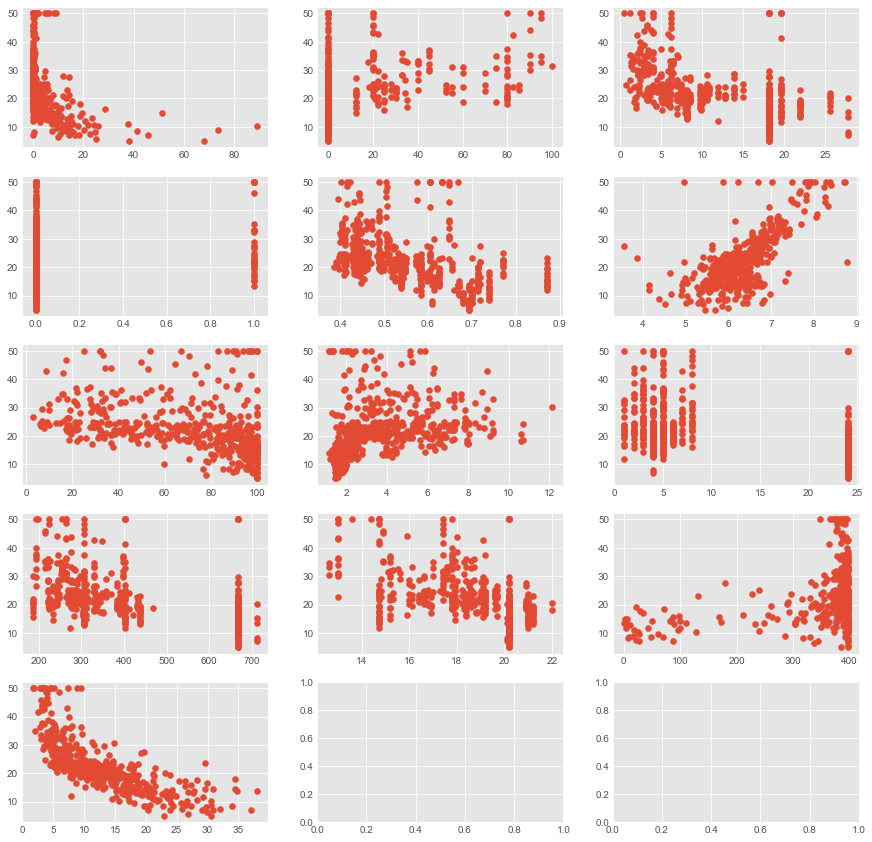

In [600]:
X = data[:,:13]
Y = data[:,13]

f1, axmtx1 = plt.subplots(5, 3)
f1.set_figwidth(15)
f1.set_figheight(15)

col = 0
row = 0

for i,x in enumerate(X.T):
    axmtx1[i//3][i%3].scatter(x,Y)
    
    

#### (d)

The maximum coeffecient correlation appears to be of between index 8 and 9 which is column 9 and 10 with the maximum value being 0.910228.

These are the "index of accessibility to radial highways" and the "full-value property-tax rate per $10,000" variables.

The code used to get at these values is below.

In [601]:
# observe corr_coeff as pd dataframe
corr_coef = np.corrcoef(X.T)
pd.DataFrame(corr_coef)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [602]:
# get indicies of max value
max_ind = np.unravel_index(np.argmax(corr_coef-np.eye(13), axis=None), corr_coef.shape)
max_ind

(8, 9)

In [603]:
# confirm
corr_coef[max_ind] == np.max(corr_coef-np.eye(13))

True

### Problem 1.2 Linear regression

**(a)**

The function is implemented as follows

In [604]:
def LR_solve(X,y):
    Xm = np.matrix(X)
    Ym = np.matrix(y)
    Ym = Ym.T
    
    print(Xm.shape)
    print(Ym.shape)
    
    A = (Xm.T*Xm)
    B = Xm.T*Ym  
    
    print(A.shape)
    print(B.shape)
    print((A*B).shape)
    
    return np.array((A.I*B).T)[0]

We view the type of results we get for each coeffecient below.

(506, 13)
(506, 1)
(13, 13)
(13, 1)
(13, 1)
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


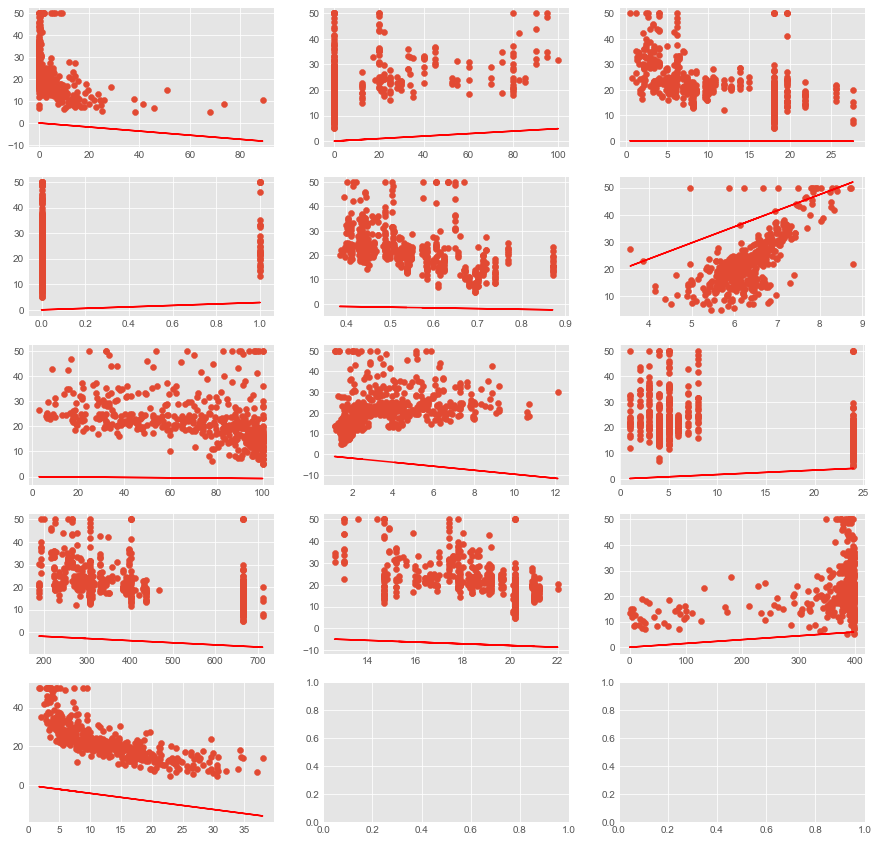

In [605]:
W = LR_solve(X,Y)

f, axmtx = plt.subplots(5, 3)
f.set_figwidth(15)
f.set_figheight(15)

col = 0
row = 0
print(W)
for i,x in enumerate(X.T):
    axmtx[i//3][i%3].scatter(x,Y)
    axmtx[i//3][i%3].plot(x,x*W[i], 'r')
    
    

**(b)**

The function is implemented below.

In [9]:
def LR_perdict(x,w):
    return np.matmul(x,w.T)

**(c)**

The following is a markdown copy of the actual entire `main1_2` script.


```python
#!/usr/bin/python3



In [606]:
''' 
main1_2.py

Write and submit the program main1_2 that:
    *loads the train and test set.
    * learns the weights for the training set.
    * computes the mean squared error of your predictor on:
        * The training set.
        * The testing set.

'''

import numpy as np

def LR_solve(X,Y):
    ''' retruns linear coeffs'''
    Xm = np.matrix(X)
    Ym = np.matrix(Y)
    Ym = Ym.T

    A = Xm.T*Xm
    B = Xm.T*Ym

    return np.array((A.I*B).T)[0]

def LR_predict(X,W):
    ''' returns linear solution '''
    return np.matmul(X,W.T)

def calc_mse(X,Y,W):
    ''' Uses a previously calculated W to
    calculate the error between an input
    X matrix and the correspoding 'true'
    dependent values Y'''

    SqErr = 0.0

    for x,y in zip(X,Y):

        y_hat = LR_predict(x,W)
        SqErr += (y_hat - y)**2

    return SqErr/len(Y)


def main():
    '''
    * loads the train and test set.
    * learns the weights for the training set.
    * computes the mean squared error of your predictor on:
        * The training set.
        * The testing set.
    '''


    # load the training set
    data_train = np.loadtxt('housing_train.txt')

    # load the testing data
    data_test = np.loadtxt('housing_test.txt')


    # set X and Y training variables
    X_train = data_train[:,:13]
    Y_train = data_train[:,13]

    # set X and Y training variables
    X_test= data_test[:,:13]
    Y_test= data_test[:,13]

    # get the weights form the training data
    W = LR_solve(X_train,Y_train)

    # calculate the mse for the training data
    training_MSE = calc_mse(X_train, Y_train, W)
    print(training_MSE)

    # calculate the mse for the testing data
    testing_MSE = calc_mse(X_test, Y_test, W)
    print(testing_MSE)





**(d)**

The weight parameters resulting form linear regression on the training data are as follows.

In [611]:
data_train = np.loadtxt('housing_train.txt')
X_train = data_train[:,:-1]
Y_train = data_train[:,-1]
for i,v in enumerate(LR_solve(X_train, Y_train)):
    print("Parameter", i, ":", v)

Parameter 0 : -0.09793423797513467
Parameter 1 : 0.048958676456233086
Parameter 2 : -0.025392847797614415
Parameter 3 : 3.450879270825558
Parameter 4 : -0.35545893143716967
Parameter 5 : 5.816532717682833
Parameter 6 : -0.003314479631016054
Parameter 7 : -1.0205013400306107
Parameter 8 : 0.22656320801073804
Parameter 9 : -0.012245878523061915
Parameter 10 : -0.38802987851697424
Parameter 11 : 0.017021497145139564
Parameter 12 : -0.48501295534610733


The training and testing MSE's are as follwos

In [612]:
import main1_2
#reload(main1_2)
main1_2.main()

[-9.79342380e-02  4.89586765e-02 -2.53928478e-02  3.45087927e+00
 -3.55458931e-01  5.81653272e+00 -3.31447963e-03 -1.02050134e+00
  2.26563208e-01 -1.22458785e-02 -3.88029879e-01  1.70214971e-02
 -4.85012955e-01]
Training MSE: 24.475882784643677
Testing MSE: 24.29223817565987


We can see that there is a strange situation where the model is actually performing better on the testing data than it is on the training data.

## Online Linear Regression with Gradient Decent

In [609]:

# Normalization: returns normalization parameters
def normalize(X):
    X_bar = np.mean(X, axis=0)
    X_sigma = np.std(X, axis=0)
    return (X_bar, X_sigma)


def weight_update(W, X, i, X_bar, X_sigma, Y):
    X_tilda = (X-X_bar)/X_sigma
    #print(X_tilda.shape)
    #print(W.shape)
    #print((np.matmul(X_tilda, W.T)))
    return W + (2.0/(i+1))*(Y - np.matmul(X_tilda, W.T))*X_tilda

def predict(W, X, X_bar, X_sigma):
    X_tilda = (X-X_bar)/X_sigma
    return np.matmul(X_tilda, W.T)

def train_test(X_train,Y_train,X_test,Y_test, iterations=1000):
    
    #print(len(X_train), len(X_test))
    
    # empty weight vector
    W = np.zeros(13)
    W_track = []
    
    # normalization constants
    X_bar, X_sigma = normalize(X_train)
    
    # calculate weights
    sz = len(X_train)
    for i in range(iterations):
        W = weight_update(W, X_train[i%sz], i, X_bar, X_sigma, Y_train[i%sz])
        if not i%50:
            W_track.append(W)
    
    # calculate mse for training set
    train_sse = 0.0
    for x,y in zip(X_train,Y_train):
        train_sse += (y - predict(W, x, X_bar, X_sigma))**2
    train_mse = train_sse/len(X_train)
    
    # calculate mse for test set
    test_sse = 0.0
    for x,y in zip(X_test,Y_test):
        test_sse += (y - predict(W, x, X_bar, X_sigma))**2
    test_mse = test_sse/len(X_test)
    
    #print("Training MSE:", train_mse)
    #print("Test MSE:", test_mse)
    
    return W, np.array(W_track), train_mse, test_mse
        

def train_test_no_norm(X_train,Y_train,X_test,Y_test, iterations=1000):
    
    #print(len(X_train), len(X_test))
    
    # empty weight vector
    W = np.zeros(13)
    
    # calculate weights
    sz = len(X_train)
    for i in range(iterations):
        #print((2.0/(i+1))*(Y_train[i%sz] - np.matmul(X_train[i%sz], W.T))*X_train[i%sz])
        W += (2.0/(i+1))*(Y_train[i%sz] - np.matmul(X_train[i%sz], W.T))*X_train[i%sz]
        #print(W)
    
    # calculate mse for training set
    train_sse = 0.0
    for x,y in zip(X_train,Y_train):
        train_sse += (y - np.matmul(x,W))**2
    train_mse = train_sse/len(X_train)
    
    # calculate mse for test set
    test_sse = 0.0
    for x,y in zip(X_test,Y_test):
        test_sse += (y - np.matmul(x,W))**2
    test_mse = test_sse/len(X_test)
    
    #print("Training MSE:", train_mse)
    #print("Test MSE:", test_mse)
    
    return W
        
    

In [610]:

# Load Training
data_train = np.loadtxt('housing_train.txt')
X_train = data_train[:,:13]
Y_train = data_train[:,13]

# Load Test
data_test = np.loadtxt('housing_test.txt')
X_test = data_test[:,:13]
Y_test = data_test[:,13]

print("With Normalization")
W, W_track, train_mse, test_mse= train_test(X_train,Y_train,X_test,Y_test, iterations=1000)
print(train_mse)
print(test_mse)

print("Without Normalization")
W_nn = train_test_no_norm(X_train,Y_train,X_test,Y_test, iterations=1000)


With Normalization
63057.84294408763
135911.78919107263
Without Normalization


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in multiply


### Regression plots

[   4.75302658   57.52077636   21.9516961   -15.17355066  379.74666185
   61.25064625 -190.00735064  115.30544902 -277.36524013   76.93395834
  129.02210716   98.11232952  -13.32672389]


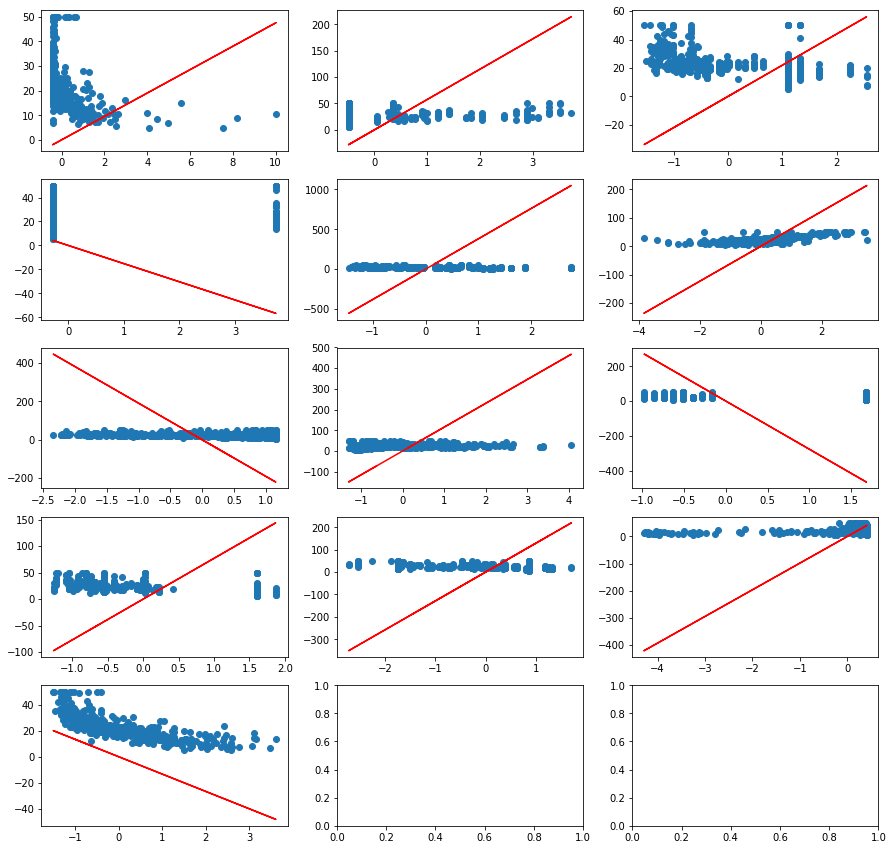

In [17]:

x_bar, x_sig = normalize(X_train)

f, axmtx = plt.subplots(5, 3)
f.set_figwidth(15)
f.set_figheight(15)

col = 0
row = 0
print(W)
for i,x in enumerate(X.T):

    axmtx[i//3][i%3].scatter(((x-x_bar[i])/x_sig[i]),Y)
    axmtx[i//3][i%3].plot(((x-x_bar[i])/x_sig[i]),((x-x_bar[i])/x_sig[i])*W[i], 'r')
    

### Weights Converging

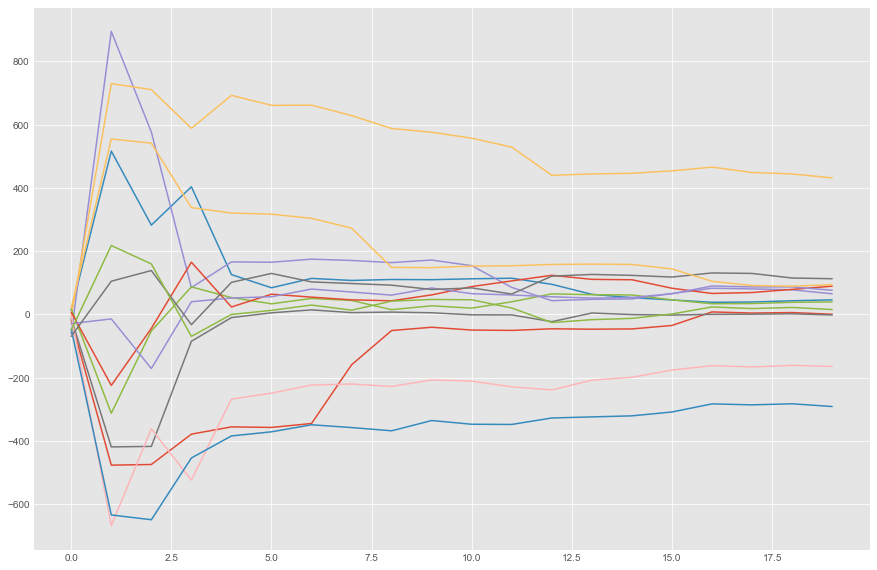

In [613]:
training = plt.figure(figsize=(15,10))
for i in range(13):
    plt.plot(W_track.T[i])
    

In [21]:
mse_track_train = []
mse_track_test = []

for i in range(1000):
    if not i%50:
        _, _, train_mse, test_mse = train_test(X_train,Y_train,X_test,Y_test, iterations=i)
        mse_track_train.append(train_mse)
        mse_track_test.append(test_mse)
        

68218.14307585357


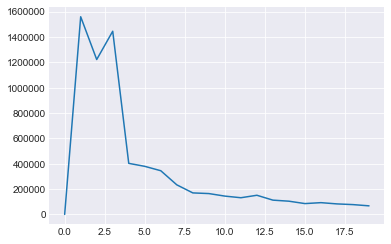

In [452]:
plt.plot((mse_track_train))
print(mse_track_train[-1])

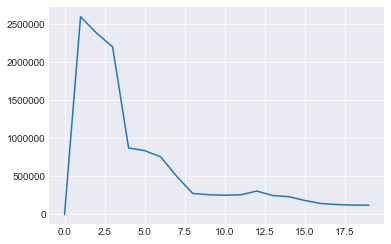

In [451]:
plt.plot((mse_track_test))

## Regression with polynomials

**(a)**


In [84]:
def extendx(X):
    
    # get shapes of input vectors
    rows, cols = X.shape
    
    # 1 intercept + 13 base features + 13^2 quadratic features
    X_ext = np.empty((rows, 1 + cols*(1+cols)), dtype=float)
    
    # instert intercept column
    X_ext[:, 0] = np.ones(shape=(rows,1), dtype=float).T
    
    # insert base features
    X_ext[:, 1:cols+1] = X
    
    # build quadratic features
    for i in range(cols):
        # insert indecies
        start = 1 + cols + i*cols
        end = 1 + 2*cols + i*cols
        # add to matrix
        X_ext[:,start:end] = np.multiply(X,np.roll(X,shift=i,axis=1))

    return X_ext
        

In [72]:
data_train = np.loadtxt('housing_train.txt')
X_train = data_train[:,:13]

Xx = extendx(X_train)

print(Xx.shape)



(433, 183)


**(c)**

In [115]:
# Normalization: returns normalization parameters
def normalize(X):
    X_bar = np.mean(X, axis=0)
    X_sigma = np.std(X, axis=0)
    return (X_bar, X_sigma)

def LR_solve(X,y):
    
    # convert to numpy matrix datatypes
    Xm = np.matrix(X)
    Ym = np.matrix(y)
    Ym = Ym.T
    
    # create A and B matricies
    A = (Xm.T*Xm)
    B = Xm.T*Ym  

    # return linear solution weight vector
    return np.array((A.I*B).T)

def LR_predict(X,W):
    ''' returns linear solution '''
    return np.matmul(X,W.T)

def calc_mse(X,Y,W):
    ''' Uses a previously calculated W to
    calculate the error between an input
    X matrix and the correspoding 'true'
    dependent values Y'''

    #print(X.shape)
    #print(Y.shape)
    #print(W.shape)

    SqErr = 0.0

    for x,y in zip(X,Y):

        y_hat = LR_predict(x,W)
        SqErr += (y_hat - y)**2

    return SqErr/len(Y)


def main1_4():
    
    data_train = np.loadtxt('housing_train.txt')
    data_test = np.loadtxt('housing_test.txt')
    
    X_train = data_train[:,:13]
    Y_train = data_train[:,13]
    
    X_test = data_test[:,:13]
    Y_test = data_test[:,13]
    
    x_bar, x_sigma = normalize(X_train)
    X_train_normalized = extendx((X_train - x_bar)/x_sigma)
    X_test_normalized = extendx((X_test - x_bar)/x_sigma)
    
    W = LR_solve(X_train_normalized, Y_train)
    print(W.shape)
    
    train_MSE = calc_mse(X_train_normalized, Y_train, W)
    test_MSE = calc_mse(X_test_normalized, Y_test, W)
    
    print("Train MSE", train_MSE)
    print("Test MSE", test_MSE)
    
main1_4()

(1, 183)
Train MSE [4.21384675e+57]
Test MSE [5.89238454e+57]


In [108]:
### RETEST ORIG
data_train = np.loadtxt('housing_train.txt')
X_train = data_train[:,:13]
Y_train = data_train[:,13]

bar, sig = normalize(X_train)

switch=1

if switch==1:
    X = np.matrix((X_train - bar)/sig)
    Y = np.matrix(Y_train).T
    

if switch==2:
    X = X_train
    Y = Y_train
        
W = LR_solve(X,Y.T)


In [110]:

calc_mse(X,Y,W)

matrix([[544.99036252]])

In [85]:
np.sqrt(68218.14307585357)

261.18603154811626

In [103]:
X.shape


(433, 13)

In [104]:
np.mean(X, axis=0)

matrix([[-5.48701449e-17,  5.17933143e-16,  8.96767905e-16,
          6.68697840e-16, -1.00618769e-14, -4.38473994e-15,
          4.35499725e-16,  9.69458027e-16, -7.69207638e-18,
         -4.08705658e-16,  3.52440684e-14,  7.83720022e-15,
         -4.53319702e-16]])

In [105]:
data_train = np.loadtxt('housing_train.txt')
X_train = data_train[:,:13]

In [107]:
np.std(X_train, axis=0)

array([8.52774709e+00, 2.37034838e+01, 6.65076999e+00, 2.49977998e-01,
       1.15274380e-01, 7.11457277e-01, 2.77647447e+01, 2.05352800e+00,
       8.67685970e+00, 1.67281573e+02, 2.12581157e+00, 8.44695207e+01,
       7.08127245e+00])

## Classification

## Data Analysis

In [334]:
data_train = np.loadtxt('classification_train.txt')

X0 = data_train[data_train[:,2]==0,:]
X1 = data_train[data_train[:,2]==1,:]

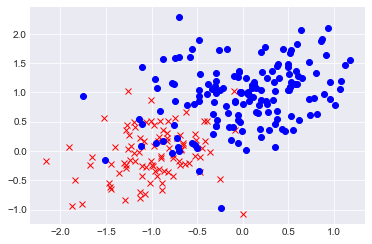

In [371]:
plt.plot(X0[:,0], X0[:,1].T, 'xr')
plt.plot(X1[:,0].T, X1[:,1].T, 'ob')

## Logistic Regression

In [411]:
def g(z):
    return np.power(1+np.exp(-z), -1)

In [412]:
def W_update(X,Y,W,k):
    
    z=W.T*X.T
    gwt = g(z)
    delta_L = (Y.T-gwt)
    
    s = delta_L*X

    return W + (2/(k+1))*s.T

    

In [413]:
D = np.matrix(data_train)
X = D[:,:2]
Y = D[:,2]



In [414]:
W = np.matrix(np.ones((2,1), dtype=float))
for k in range(500):
    W=W_update(X,Y, W,k)
    #if not k%1: print(W[0,0],W[1,0])
W

matrix([[2.22020381],
        [3.47979157]])

In [415]:
W_final = np.array(W.T)[0]

In [416]:
W_final

array([2.22020381, 3.47979157])

### Learned Regression Line

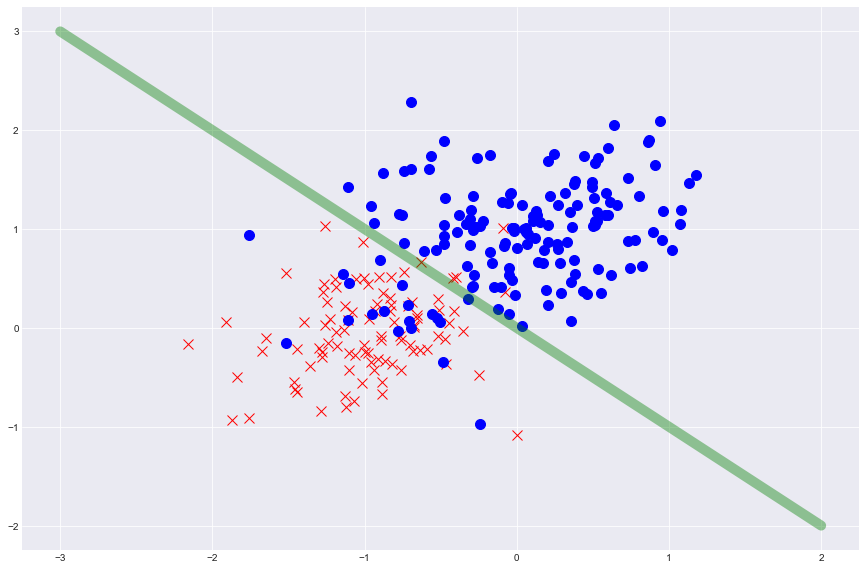

In [555]:
Log_R_plot = plt.figure(figsize=(15,10))

x = np.linspace(-3,2,100)
y = x*(-W_final[0]/W_final[1])
y=-x

point_size = 10

plt.plot(X0[:,0], X0[:,1].T, 'xr', markersize=point_size)
plt.plot(X1[:,0].T, X1[:,1].T, 'ob', markersize=point_size)
plt.plot(x,y, 'g', linewidth=10, alpha = 0.4)

In [467]:

def get_error(X,Y,W):
    predict = g(X*W)>.5
    actual = Y>.5
    
    tt = np.array(np.int32((predict == actual).T))[0]
    return 1 - sum(tt)/len(tt)


def main2_1():
    
    # load data files
    data_train = np.loadtxt("classification_train.txt")
    data_test = np.loadtxt("classification_test.txt")
    
    # build training data matricies
    X_train = np.matrix(data_train[:,:-1])
    Y_train = np.matrix(data_train[:,-1]).T
    
    # build testing data matricies
    X_test = np.matrix(data_test[:,:-1])
    Y_test = np.matrix(data_test[:,-1]).T
    
    # train, keeping track of error
    train_error = []
    test_error = []
    x = []
    
    W = np.matrix(np.ones((2,1), dtype=float))
    for k in range(501):
        W = W=W_update(X_train,Y_train, W,k)
        if not k%50:
            train_error.append(get_error(X_train, Y_train, W))
            test_error.append(get_error(X_test, Y_test,W))
            x.append(k)
            
    log_err_trk = plt.figure(figsize=(20,10))
    
    plt.plot(x,train_error, '-r')
    plt.plot(x,test_error)
    
    return (train_error, test_error)
        
    
    



### Error/Itterations (Train/Test)

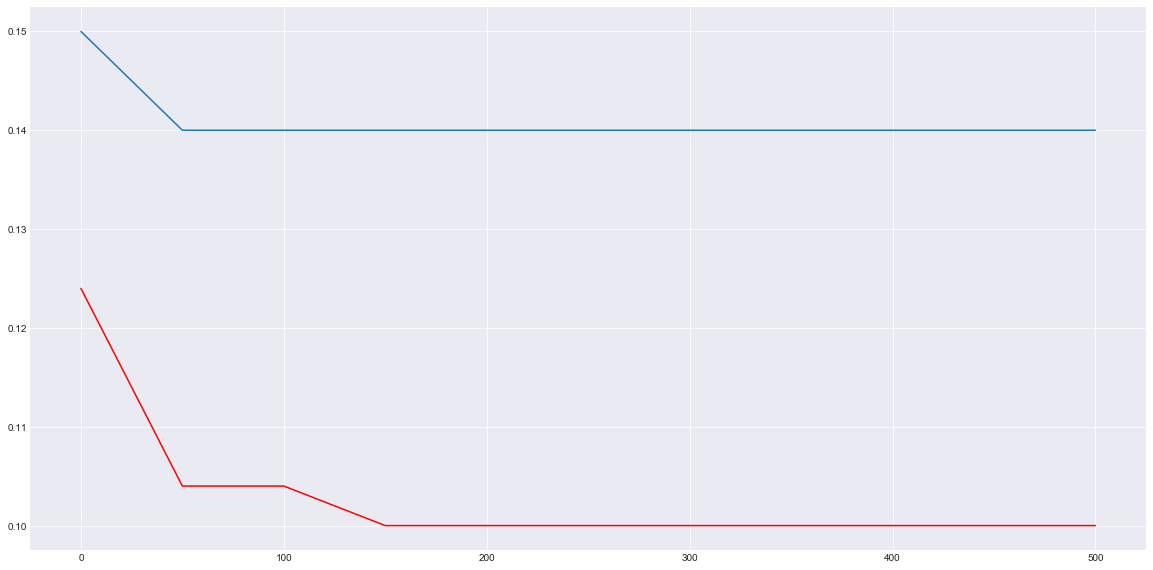

In [468]:
main2_1();

##  Generative classification model

In [499]:
def get_mean_and_sigma(X):
    mean = np.array([np.mean(X[:,0]), np.mean(X[:,1])])
    sigma = np.cov(X.T)
    return mean, sigma
    


In [500]:
# load data files
data_train = np.loadtxt("classification_train.txt")
data_one = data_train[data_train[:,-1]==1]
data_zero = data_train[data_train[:,-1]==0]

data_test = np.loadtxt("classification_test.txt")


# build training data matricies
X_one = np.matrix(data_one[:,:-1])
Y_one = np.matrix(data_one[:,-1]).T

X_zero = np.matrix(data_zero[:,:-1])
Y_zero = np.matrix(data_zero[:,-1]).T

In [486]:
Y_one.shape

(155, 1)

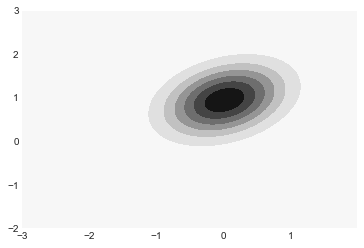

In [517]:
from scipy.stats import multivariate_normal

mean1, sigma1 = get_mean_and_sigma(X_one)
x, y = np.mgrid[-3:2:.01, -2:3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = scipy.stats.multivariate_normal(mean1, sigma1)
plt.contourf(x, y, rv.pdf(pos))

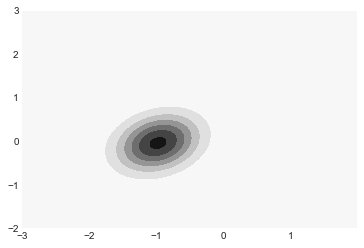

In [518]:

mean0, sigma0 = get_mean_and_sigma(X_zero)
x, y = np.mgrid[-3:2:.01, -2:3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = scipy.stats.multivariate_normal(mean0, sigma0)
plt.contourf(x, y, rv.pdf(pos))

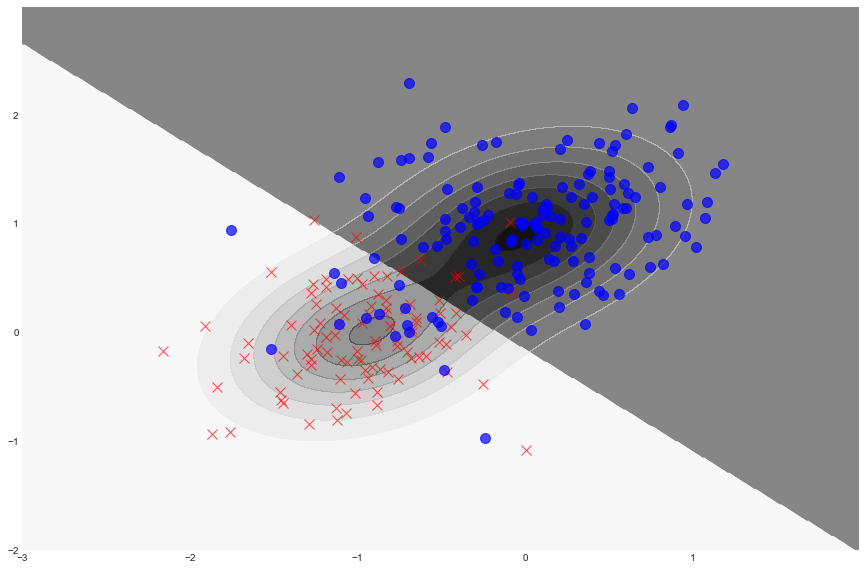

In [558]:
sigma_combined = (sigma0+sigma1)/2

mean0, sigma0 = get_mean_and_sigma(X_zero)
x, y = np.mgrid[-3:2:.01, -2:3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv1 = scipy.stats.multivariate_normal(mean1, sigma_combined) 
rv0 = scipy.stats.multivariate_normal(mean0, sigma_combined)

c1_prior = np.sum(Y_train)/np.size(Y_train)

contourfig = plt.figure(figsize=(15,10))
plt.contourf(x, y, (rv1.pdf(pos)*c1_prior)/(rv1.pdf(pos)*(c1_prior)+rv0.pdf(pos)*(1-c1_prior))>.5,  alpha=1)
plt.contourf(x, y, rv1.pdf(pos)+rv0.pdf(pos), alpha =.5)
plt.plot(X0[:,0], X0[:,1].T, 'xr', markersize=point_size, alpha=.7)
plt.plot(X1[:,0].T, X1[:,1].T, 'ob', markersize=point_size, alpha=.7)



In [596]:
def main2_2():
    # load data files
    data_train = np.loadtxt("classification_train.txt")
    data_one = data_train[data_train[:,-1]==1]
    data_zero = data_train[data_train[:,-1]==0]

    data_test = np.loadtxt("classification_test.txt")


    # build training data matricies
    X_one = np.matrix(data_one[:,:-1])
    Y_one = np.matrix(data_one[:,-1]).T

    X_zero = np.matrix(data_zero[:,:-1])
    Y_zero = np.matrix(data_zero[:,-1]).T
    
    # get means and sigmas for training sets
    mean0, sigma0 = get_mean_and_sigma(X_zero)
    mean1, sigma1 = get_mean_and_sigma(X_one)
    
    # compute mean sigma for combination
    sigma_combined = (sigma0+sigma1)/2
    
    # get class 1 prior
    thata_c1 = np.size(Y_one)/(np.size(Y_one)+np.size(Y_zero))
    
    # build class conditional likelihoods
    c1_likelihood = scipy.stats.multivariate_normal(mean1, sigma_combined) 
    c0_likelihood = scipy.stats.multivariate_normal(mean0, sigma_combined)
    
    # returns class given datapoint
    def predict_class(X):
        return float((c1_likelihood.pdf(X)*thata_c1)/(c1_likelihood.pdf(X)*(thata_c1)+c0_likelihood.pdf(X)*(1-thata_c1))>.5)
    
    # returns error ratio given data
    def calc_error(X,Y):
        predictions = np.matrix([predict_class(x) for x in X])
        predictions = predictions.T
        correct = np.float64(predictions == Y)
        error = 1-(np.sum(correct.T)/np.size(correct))
        return error
        
    X_train = np.matrix(data_train[:,:-1])
    Y_train = np.matrix(data_train[:,-1]).T
    print("Training Error: ", calc_error(X_train, Y_train)) 
    
    X_test = np.matrix(data_test[:,:-1])
    Y_test = np.matrix(data_test[:,-1]).T
    print("Testing Error: ", calc_error(X_test, Y_test)) 

In [597]:
x = main2_2()

Training Error:  0.09999999999999998
Testing Error:  0.10999999999999999
